# <font color='green'>WORDLE-VISION!</font>

In [1]:
from urllib.request import urlopen
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in and filter lexicon

In [2]:
url = 'https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt'
file = urlopen(url)
all_words = set(file.read().decode('utf-8').split())

### Or if you have a word file already on your computer, you can read it in as follows:
# local_file = 'words_alpha.txt'
# with open(local_file) as word_file:
#     all_words = set(word_file.read().split())

In [3]:
# Keep only the 5-letter words
wordle_words = [i.upper() for i in all_words if len(i) == 5]
print(f"There are {len(wordle_words)} 5-letter words in the lexicon.")
wordle_words[0:10]

There are 15918 5-letter words in the lexicon.


['AMARA',
 'AGATY',
 'PSYCH',
 'ALLIS',
 'GRAIL',
 'AXONS',
 'GUTTY',
 'RUPIA',
 'GOMER',
 'NIDOR']

## Get frequency distribution of letters

In [4]:
cnt = Counter()
for i in wordle_words:
    cnt.update(Counter(i))
cnt

Counter({'A': 8392,
         'M': 2494,
         'R': 5143,
         'G': 1971,
         'T': 4189,
         'Y': 2521,
         'P': 2299,
         'S': 6537,
         'C': 2744,
         'H': 2284,
         'L': 4246,
         'I': 5067,
         'X': 361,
         'O': 5219,
         'N': 4043,
         'U': 3361,
         'E': 7800,
         'D': 2811,
         'B': 2089,
         'K': 1743,
         'W': 1171,
         'V': 878,
         'Z': 474,
         'F': 1238,
         'J': 376,
         'Q': 139})

In [5]:
cnt_sorted = dict(cnt.most_common())
cnt_sorted

{'A': 8392,
 'E': 7800,
 'S': 6537,
 'O': 5219,
 'R': 5143,
 'I': 5067,
 'L': 4246,
 'T': 4189,
 'N': 4043,
 'U': 3361,
 'D': 2811,
 'C': 2744,
 'Y': 2521,
 'M': 2494,
 'P': 2299,
 'H': 2284,
 'B': 2089,
 'G': 1971,
 'K': 1743,
 'F': 1238,
 'W': 1171,
 'V': 878,
 'Z': 474,
 'J': 376,
 'X': 361,
 'Q': 139}

In [6]:
freq_sorted = {k: round(v / (5*len(wordle_words)), 4) for k, v in cnt_sorted.items()}
freq_sorted

{'A': 0.1054,
 'E': 0.098,
 'S': 0.0821,
 'O': 0.0656,
 'R': 0.0646,
 'I': 0.0637,
 'L': 0.0533,
 'T': 0.0526,
 'N': 0.0508,
 'U': 0.0422,
 'D': 0.0353,
 'C': 0.0345,
 'Y': 0.0317,
 'M': 0.0313,
 'P': 0.0289,
 'H': 0.0287,
 'B': 0.0262,
 'G': 0.0248,
 'K': 0.0219,
 'F': 0.0156,
 'W': 0.0147,
 'V': 0.011,
 'Z': 0.006,
 'J': 0.0047,
 'X': 0.0045,
 'Q': 0.0017}

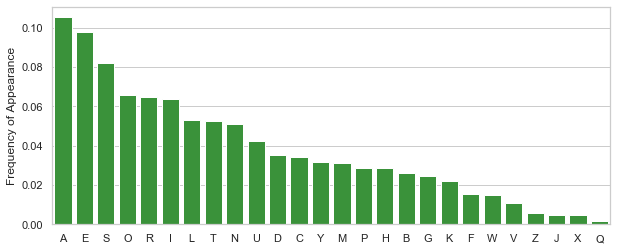

In [7]:
sorted_keys = list(freq_sorted.keys())
sorted_vals = list(freq_sorted.values())

fig = plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
sns.barplot(x=sorted_keys, y=sorted_vals, color='tab:green')
plt.ylabel('Frequency of Appearance')
fig.savefig('letter_freq.png', dpi=200)

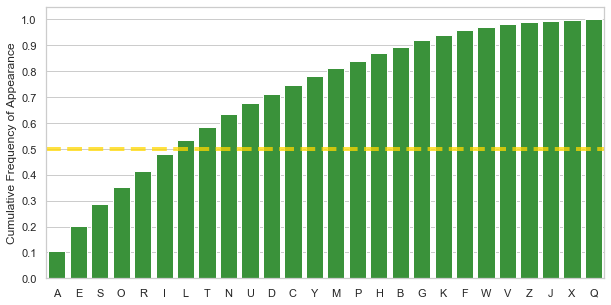

In [8]:
# The top 7 letters account for more than half of letters in all 5-letter words

fig = plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x=sorted_keys, y=np.cumsum(sorted_vals), color='tab:green')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(y=0.5, ls='--', lw=4, c='gold', alpha=0.75)
plt.ylabel('Cumulative Frequency of Appearance')
fig.savefig('letter_freq_cumulative.png', dpi=200)

## Find words that contain only the top 7 letters
### These will be the best starting guesses

In [9]:
top_letters = ''.join(sorted_keys[0:7])
top_letter_words = []

for i in wordle_words:
    is_best = all(x in top_letters for x in i)
    if is_best:
        top_letter_words.append(i)
top_letter_words.sort()
print(f"There are {len(top_letter_words)} words containing only the top 7 letters.")

There are 231 words containing only the top 7 letters.


## We can further refine this by requiring that each letter be different

In [10]:
best_guesses = []

for i in top_letter_words:
    num_uniq_letters = len(set(i))
    if num_uniq_letters == 5:
        best_guesses.append(i)
print(f"There are {len(best_guesses)} words containing only the top 7 letters where each letter is different.")

There are 60 words containing only the top 7 letters where each letter is different.


In [11]:
best_guesses

['AESIR',
 'AISLE',
 'ALISO',
 'ALOES',
 'ALOIS',
 'ALOSE',
 'ARIEL',
 'ARIES',
 'ARILS',
 'ARISE',
 'ARLES',
 'AROSE',
 'ARSLE',
 'EARLS',
 'ELIAS',
 'IREOS',
 'LAIRS',
 'LARES',
 'LASER',
 'LEARS',
 'LEORA',
 'LIARS',
 'LIERS',
 'LIRAS',
 'LORES',
 'LORIS',
 'LOSER',
 'OILER',
 'ORALE',
 'ORALS',
 'OREAS',
 'ORIAS',
 'ORIEL',
 'ORLES',
 'ORSEL',
 'OSELA',
 'OSIER',
 'RAILS',
 'RAISE',
 'RALES',
 'REALS',
 'REOIL',
 'RIALS',
 'RIELS',
 'RILES',
 'ROILS',
 'ROLES',
 'ROSAL',
 'ROSEL',
 'SEORA',
 'SERAI',
 'SERAL',
 'SERIO',
 'SLARE',
 'SLIER',
 'SOLAR',
 'SOLEA',
 'SOLER',
 'SORAL',
 'SOREL']

In [12]:
# Save list of words to text file
outfile = open('best_guesses.txt', 'w')
for i in best_guesses:
    outfile.write(i + '\n')
outfile.close()

## You can manually filter out the less common words above to get even better guesses